In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
gold_df = pd.read_csv('data/gold.csv',parse_dates=["Date"], index_col="Date")
gold_df = gold_df.sort_index(ascending=True)
gold_df.head()

,Price,Open,High,Low,Vol.,Change
Date,,,,,,
2006-01-03,532.5,519.9,532.8,517.6,64.87K,2.46%
2006-01-04,535.6,532.7,537.7,527.0,69.33K,0.58%
2006-01-05,527.8,536.3,536.8,524.0,68.73K,-1.46%
2006-01-06,541.2,527.8,541.8,524.5,70.07K,2.54%
2006-01-09,550.5,541.8,551.3,536.5,88.71K,1.72%


In [3]:
""" vix_df = pd.read_csv('data/vix.csv',parse_dates=["Date"], index_col="Date")
vix_df = vix_df.sort_index(ascending=True)
vix_df.head() """

' vix_df = pd.read_csv(\'data/vix.csv\',parse_dates=["Date"], index_col="Date")\nvix_df = vix_df.sort_index(ascending=True)\nvix_df.head() '

In [4]:
fsi_df = pd.read_csv('data/fsi.csv',parse_dates=["Date"], index_col="Date")
fsi_df = fsi_df.sort_index(ascending=True)
fsi_df.head()

,OFR FSI,Credit,Equity valuation,Safe assets,Funding,Volatility,United States,Other advanced economies,Emerging markets
Date,,,,,,,,,
2000-01-03,2.140,0.540,-0.051,0.670,0.472,0.509,1.769,0.521,-0.150
2000-01-04,2.421,0.604,0.079,0.627,0.550,0.561,2.084,0.474,-0.137
2000-01-05,2.297,0.575,0.080,0.653,0.501,0.488,2.023,0.406,-0.132
2000-01-06,2.292,0.546,0.082,0.581,0.566,0.517,2.064,0.355,-0.127
2000-01-07,2.005,0.662,-0.011,0.519,0.565,0.270,1.769,0.367,-0.131


In [5]:
inf_df = pd.read_csv('data/inflation.csv',parse_dates=["observation_date"], index_col="observation_date")
inf_df = inf_df.sort_index(ascending=True)
inf_df.head()

,T10YIE
observation_date,
2006-01-03,2.34
2006-01-04,2.35
2006-01-05,2.32
2006-01-06,2.33
2006-01-09,2.33


In [6]:
ds_df = pd.read_csv('data/dollar_strength.csv',parse_dates=["observation_date"], index_col="observation_date")
ds_df = ds_df.sort_index(ascending=True)
ds_df.head()

,DTWEXBGS
observation_date,
2006-01-02,101.4155
2006-01-03,100.7558
2006-01-04,100.2288
2006-01-05,100.2992
2006-01-06,100.0241


In [7]:
cpi_df = pd.read_csv('data/cpi.csv',parse_dates=["observation_date"], index_col="observation_date")
cpi_df = cpi_df.sort_index(ascending=True)
cpi_df.head()

,MEDCPIM158SFRBCLE
observation_date,
1983-01-01,5.014653
1983-02-01,4.952545
1983-03-01,3.612261
1983-04-01,4.828054
1983-05-01,3.767326


In [8]:
b10_df = pd.read_csv('data/DGS10.csv',parse_dates=["observation_date"], index_col="observation_date")
b10_df = b10_df.sort_index(ascending=True)
b10_df.head()

,DGS10
observation_date,
2006-01-03,4.37
2006-01-04,4.36
2006-01-05,4.36
2006-01-06,4.38
2006-01-09,4.38


In [9]:
""" vix_df = vix_df.drop(['Open', 'High', 'Low', 'Vol.'], axis=1)
gold_df = pd.merge(gold_df,vix_df,left_index=True, right_index=True, how="left")
del vix_df """

' vix_df = vix_df.drop([\'Open\', \'High\', \'Low\', \'Vol.\'], axis=1)\ngold_df = pd.merge(gold_df,vix_df,left_index=True, right_index=True, how="left")\ndel vix_df '

In [10]:
gold_df = pd.merge(gold_df,b10_df,left_index=True, right_index=True, how="left")
del b10_df

In [11]:
fsi_df = fsi_df.drop(['Credit', 'Equity valuation', 'Funding',
       'Volatility', 'United States', 'Other advanced economies',
       'Emerging markets'], axis=1)
gold_df = pd.merge(gold_df,fsi_df,left_index=True, right_index=True, how="left")
del fsi_df

In [12]:
gold_df = pd.merge(gold_df,cpi_df,left_index=True, right_index=True, how="left")
del cpi_df

In [13]:
""" inf_df = inf_df.replace("-", np.nan)
full_range = pd.date_range(start=inf_df.index.min(), end=inf_df.index.max(), freq="D")
inf_df = inf_df.reindex(full_range).ffill() """

' inf_df = inf_df.replace("-", np.nan)\nfull_range = pd.date_range(start=inf_df.index.min(), end=inf_df.index.max(), freq="D")\ninf_df = inf_df.reindex(full_range).ffill() '

In [14]:
gold_df = pd.merge(gold_df,inf_df,left_index=True, right_index=True, how="left")
del inf_df

In [15]:
gold_df = pd.merge(gold_df,ds_df,left_index=True, right_index=True, how="left")
del ds_df

In [16]:
gold_df = gold_df.rename(columns={"OFR FSI":"FSI","Safe assets":"SAFE_ASSETS","MEDCPIM158SFRBCLE":"CPI","T10YIE":"INFLATION","DTWEXBGS":"STRENGTH_INDEX","DGS10":"BOND_YIELD"})

In [17]:
gold_df.describe()

,Price,Open,High,Low,BOND_YIELD,FSI,SAFE_ASSETS,CPI,INFLATION,STRENGTH_INDEX
count,5021.000000,5021.000000,5021.000000,5021.000000,4873.000000,4923.000000,4923.000000,152.000000,4874.000000,4852.000000
mean,1456.309845,1456.258474,1467.315714,1444.740613,2.893031,-0.246090,-0.035454,2.898953,2.071881,105.923709
std,557.752256,557.379250,561.232065,553.671530,1.124791,4.375899,0.247636,1.541270,0.402829,12.343142
min,527.800000,519.900000,532.800000,517.600000,0.520000,-5.334000,-0.547000,-0.286064,0.040000,85.469200
25%,1165.400000,1165.400000,1173.400000,1156.200000,2.000000,-2.836500,-0.234000,2.010760,1.830000,93.659800
50%,1322.600000,1323.200000,1330.800000,1314.600000,2.740000,-1.460000,-0.080000,2.552081,2.180000,108.786100
75%,1765.100000,1766.200000,1778.400000,1753.900000,3.820000,0.671662,0.118000,3.367982,2.340000,116.145525
max,3727.550000,3716.350000,3739.470000,3711.900000,5.260000,29.320000,1.267000,8.191572,3.020000,130.214200


In [18]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5021 entries, 2006-01-03 to 2025-09-16
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           5021 non-null   float64
 1   Open            5021 non-null   float64
 2   High            5021 non-null   float64
 3   Low             5021 non-null   float64
 4   Vol.            5017 non-null   object 
 5   Change          5021 non-null   object 
 6   BOND_YIELD      4873 non-null   float64
 7   FSI             4923 non-null   float64
 8   SAFE_ASSETS     4923 non-null   float64
 9   CPI             152 non-null    float64
 10  INFLATION       4874 non-null   float64
 11  STRENGTH_INDEX  4852 non-null   float64
dtypes: float64(10), object(2)
memory usage: 509.9+ KB


In [19]:
cols_to_convert = ["Change"]
gold_df[cols_to_convert] = gold_df[cols_to_convert].replace('%', '', regex=True).astype(float)

cols_to_convert = ["Vol."]
gold_df[cols_to_convert] = gold_df[cols_to_convert].replace('K', '', regex=True).astype(float)

In [20]:
""" cols_to_convert = ["BANK_RATE","CRR"]
gold_df[cols_to_convert] = gold_df[cols_to_convert].astype(float) """

' cols_to_convert = ["BANK_RATE","CRR"]\ngold_df[cols_to_convert] = gold_df[cols_to_convert].astype(float) '

In [21]:
gold_df.info()
gold_df["Change"] = 100*gold_df["Change"]
gold_df["Vol."] = gold_df["Vol."].pct_change()
gold_df["PREVIOUS_RANGE"] = (gold_df.High - gold_df.Low).shift(1)
gold_df["PREVIOUS_CHANGE"] = gold_df.Price.diff().shift(1)


gold_df.CPI = gold_df.CPI.ffill()

gold_df = gold_df.drop(['Open','High','Low'],axis=1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5021 entries, 2006-01-03 to 2025-09-16
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           5021 non-null   float64
 1   Open            5021 non-null   float64
 2   High            5021 non-null   float64
 3   Low             5021 non-null   float64
 4   Vol.            5017 non-null   float64
 5   Change          5021 non-null   float64
 6   BOND_YIELD      4873 non-null   float64
 7   FSI             4923 non-null   float64
 8   SAFE_ASSETS     4923 non-null   float64
 9   CPI             152 non-null    float64
 10  INFLATION       4874 non-null   float64
 11  STRENGTH_INDEX  4852 non-null   float64
dtypes: float64(12)
memory usage: 509.9 KB


C:\Users\rohit\AppData\Local\Temp\ipykernel_24744\2080978919.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gold_df["Vol."] = gold_df["Vol."].pct_change()


In [22]:
gold_df.corr()

,Price,Vol.,Change,BOND_YIELD,FSI,SAFE_ASSETS,CPI,INFLATION,STRENGTH_INDEX,PREVIOUS_RANGE,PREVIOUS_CHANGE
Price,1.000000,0.071110,0.023573,-0.084534,-0.176317,-0.407226,0.333930,0.199839,0.588059,0.487407,0.059687
Vol.,0.071110,1.000000,0.010345,0.008601,-0.024190,-0.036844,0.039465,0.012175,0.064607,-0.022836,-0.002504
Change,0.023573,0.010345,1.000000,0.019585,0.005330,0.036723,-0.000608,-0.012017,0.011626,-0.012115,-0.015508
BOND_YIELD,-0.084534,0.008601,0.019585,1.000000,0.049063,-0.096962,0.162042,0.458167,-0.079641,-0.033328,0.022230
FSI,-0.176317,-0.024190,0.005330,0.049063,1.000000,0.399917,-0.143354,-0.458798,-0.220983,0.214457,0.000035
SAFE_ASSETS,-0.407226,-0.036844,0.036723,-0.096962,0.399917,1.000000,-0.262660,-0.336677,-0.368143,-0.070586,0.016057
CPI,0.333930,0.039465,-0.000608,0.162042,-0.143354,-0.262660,1.000000,0.401162,0.521094,0.096369,0.011581
INFLATION,0.199839,0.012175,-0.012017,0.458167,-0.458798,-0.336677,0.401162,1.000000,-0.129592,-0.020626,0.002978
STRENGTH_INDEX,0.588059,0.064607,0.011626,-0.079641,-0.220983,-0.368143,0.521094,-0.129592,1.000000,0.183769,0.019273
PREVIOUS_RANGE,0.487407,-0.022836,-0.012115,-0.033328,0.214457,-0.070586,0.096369,-0.020626,0.183769,1.000000,-0.085025


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Vol.'}>,
        <Axes: title={'center': 'Change'}>],
       [<Axes: title={'center': 'BOND_YIELD'}>,
        <Axes: title={'center': 'FSI'}>,
        <Axes: title={'center': 'SAFE_ASSETS'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'INFLATION'}>,
        <Axes: title={'center': 'STRENGTH_INDEX'}>],
       [<Axes: title={'center': 'PREVIOUS_RANGE'}>,
        <Axes: title={'center': 'PREVIOUS_CHANGE'}>, <Axes: >]],
      dtype=object)

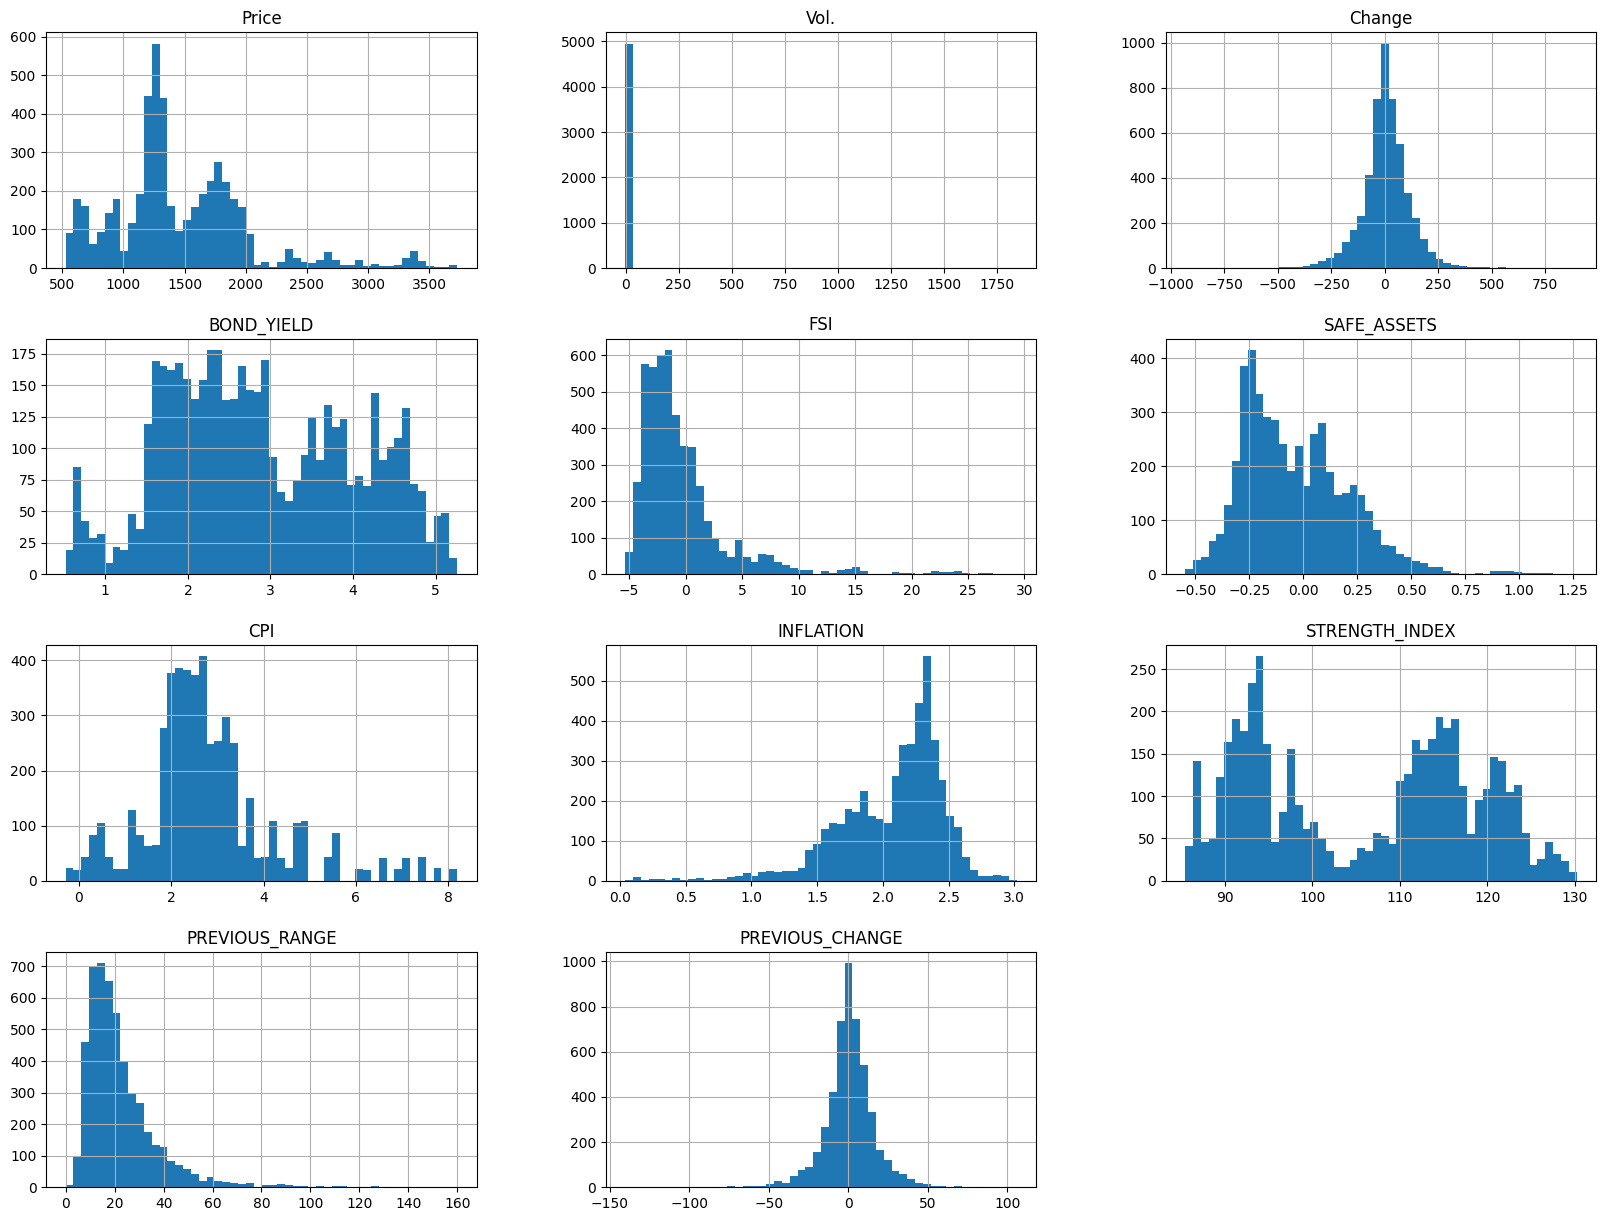

In [23]:
gold_df.hist(bins=50,figsize=(20,15))

In [24]:
""" fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Price', values=gold_df['Price']),
                              dict(label='Change', values=gold_df['Change']),
                              dict(label='SAFE_ASSETS', values=gold_df['SAFE_ASSETS']),
                              dict(label='CPI', values=gold_df['CPI']),
                              dict(label='STRENGTH_INDEX', values=gold_df['STRENGTH_INDEX']),
                              dict(label='Vol.', values=gold_df['Vol.']),
                              dict(label='INFLATION', values=gold_df['INFLATION']),
                              dict(label='BOND_YIELD', values=gold_df['BOND_YIELD']),
                              dict(label='FSI', values=gold_df['FSI']),
                              dict(label='PREVIOUS_RANGE', values=gold_df['PREVIOUS_RANGE']),
                              dict(label='PREVIOUS_CHANGE', values=gold_df['PREVIOUS_CHANGE'])],
                  marker=dict(color=gold_df['Price'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  diagonal=dict(visible=False)))
fig.update_layout(title='Scatter Plot',
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig.show() """


" fig = go.Figure(data=go.Splom(\n                  dimensions=[dict(label='Price', values=gold_df['Price']),\n                              dict(label='Change', values=gold_df['Change']),\n                              dict(label='SAFE_ASSETS', values=gold_df['SAFE_ASSETS']),\n                              dict(label='CPI', values=gold_df['CPI']),\n                              dict(label='STRENGTH_INDEX', values=gold_df['STRENGTH_INDEX']),\n                              dict(label='Vol.', values=gold_df['Vol.']),\n                              dict(label='INFLATION', values=gold_df['INFLATION']),\n                              dict(label='BOND_YIELD', values=gold_df['BOND_YIELD']),\n                              dict(label='FSI', values=gold_df['FSI']),\n                              dict(label='PREVIOUS_RANGE', values=gold_df['PREVIOUS_RANGE']),\n                              dict(label='PREVIOUS_CHANGE', values=gold_df['PREVIOUS_CHANGE'])],\n                  marker=dict(color=gold

In [25]:
gold_df.Price.autocorr()

np.float64(0.9995459200151066)

In [26]:
gold_df["PREVIOUS_PRICE"] = gold_df.Price.shift(1)

In [27]:
gold_df.corr()

,Price,Vol.,Change,BOND_YIELD,FSI,SAFE_ASSETS,CPI,INFLATION,STRENGTH_INDEX,PREVIOUS_RANGE,PREVIOUS_CHANGE,PREVIOUS_PRICE
Price,1.000000,0.071110,0.023573,-0.084534,-0.176317,-0.407226,0.333930,0.199839,0.588059,0.487407,0.059687,0.999546
Vol.,0.071110,1.000000,0.010345,0.008601,-0.024190,-0.036844,0.039465,0.012175,0.064607,-0.022836,-0.002504,0.070681
Change,0.023573,0.010345,1.000000,0.019585,0.005330,0.036723,-0.000608,-0.012017,0.011626,-0.012115,-0.015508,-0.003243
BOND_YIELD,-0.084534,0.008601,0.019585,1.000000,0.049063,-0.096962,0.162042,0.458167,-0.079641,-0.033328,0.022230,-0.084977
FSI,-0.176317,-0.024190,0.005330,0.049063,1.000000,0.399917,-0.143354,-0.458798,-0.220983,0.214457,0.000035,-0.176901
SAFE_ASSETS,-0.407226,-0.036844,0.036723,-0.096962,0.399917,1.000000,-0.262660,-0.336677,-0.368143,-0.070586,0.016057,-0.408300
CPI,0.333930,0.039465,-0.000608,0.162042,-0.143354,-0.262660,1.000000,0.401162,0.521094,0.096369,0.011581,0.334169
INFLATION,0.199839,0.012175,-0.012017,0.458167,-0.458798,-0.336677,0.401162,1.000000,-0.129592,-0.020626,0.002978,0.200481
STRENGTH_INDEX,0.588059,0.064607,0.011626,-0.079641,-0.220983,-0.368143,0.521094,-0.129592,1.000000,0.183769,0.019273,0.587939
PREVIOUS_RANGE,0.487407,-0.022836,-0.012115,-0.033328,0.214457,-0.070586,0.096369,-0.020626,0.183769,1.000000,-0.085025,0.488202


In [28]:
gold_df.columns

Index(['Price', 'Vol.', 'Change', 'BOND_YIELD', 'FSI', 'SAFE_ASSETS', 'CPI',
       'INFLATION', 'STRENGTH_INDEX', 'PREVIOUS_RANGE', 'PREVIOUS_CHANGE',
       'PREVIOUS_PRICE'],
      dtype='object')

In [29]:
features = ['BOND_YIELD', 'FSI', 'SAFE_ASSETS', 
            'CPI', 'INFLATION', 'STRENGTH_INDEX', 
            'PREVIOUS_RANGE', 'PREVIOUS_CHANGE', 'PREVIOUS_PRICE']
target = 'Change'
X = gold_df[features]
y = gold_df[target]

In [30]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import StandardScaler

from xgboost import XGBRegressor

In [31]:
tscv = TimeSeriesSplit(n_splits=5)

def evaluate_model(model, X, y, name):
    mse_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(root_mean_squared_error(y_test, y_pred))
    
    print(f"{name} Mean MSE: {np.mean(mse_scores):.4f}")
    print(y_pred-y_test)


In [32]:
ridge_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("ridge", RidgeCV())
])

evaluate_model(ridge_pipeline, X, y, "Ridge Linear Regression")

lasso_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("ridge", LassoCV())
])

evaluate_model(ridge_pipeline, X, y, "Lasso Linear Regression")

Ridge Linear Regression Mean MSE: 136.7621
Date
2022-06-21      1.532231
2022-06-22    -12.843631
2022-06-23     32.784364
2022-06-24    -17.760647
2022-06-27     18.353353
                 ...    
2025-09-11    -66.565674
2025-09-12   -117.138213
2025-09-14    -39.364063
2025-09-15   -187.450336
2025-09-16   -108.386355
Name: Change, Length: 836, dtype: float64
Lasso Linear Regression Mean MSE: 136.7621
Date
2022-06-21      1.532231
2022-06-22    -12.843631
2022-06-23     32.784364
2022-06-24    -17.760647
2022-06-27     18.353353
                 ...    
2025-09-11    -66.565674
2025-09-12   -117.138213
2025-09-14    -39.364063
2025-09-15   -187.450336
2025-09-16   -108.386355
Name: Change, Length: 836, dtype: float64


In [33]:
gold_df["price_rolling_mean_3_shift"] = gold_df["Price"].rolling(window=3).mean().shift(1)
gold_df["price_rolling_std_3_shift"] = gold_df["Price"].rolling(window=3).std().shift(1)

In [34]:
gold_df.corr()

,Price,Vol.,Change,BOND_YIELD,FSI,SAFE_ASSETS,CPI,INFLATION,STRENGTH_INDEX,PREVIOUS_RANGE,PREVIOUS_CHANGE,PREVIOUS_PRICE,price_rolling_mean_3_shift,price_rolling_std_3_shift
Price,1.000000,0.071110,0.023573,-0.084534,-0.176317,-0.407226,0.333930,0.199839,0.588059,0.487407,0.059687,0.999546,0.999310,0.416116
Vol.,0.071110,1.000000,0.010345,0.008601,-0.024190,-0.036844,0.039465,0.012175,0.064607,-0.022836,-0.002504,0.070681,0.070979,-0.007384
Change,0.023573,0.010345,1.000000,0.019585,0.005330,0.036723,-0.000608,-0.012017,0.011626,-0.012115,-0.015508,-0.003243,-0.003198,0.009678
BOND_YIELD,-0.084534,0.008601,0.019585,1.000000,0.049063,-0.096962,0.162042,0.458167,-0.079641,-0.033328,0.022230,-0.084977,-0.084927,-0.003509
FSI,-0.176317,-0.024190,0.005330,0.049063,1.000000,0.399917,-0.143354,-0.458798,-0.220983,0.214457,0.000035,-0.176901,-0.177808,0.157340
SAFE_ASSETS,-0.407226,-0.036844,0.036723,-0.096962,0.399917,1.000000,-0.262660,-0.336677,-0.368143,-0.070586,0.016057,-0.408300,-0.409447,-0.065176
CPI,0.333930,0.039465,-0.000608,0.162042,-0.143354,-0.262660,1.000000,0.401162,0.521094,0.096369,0.011581,0.334169,0.334349,0.070770
INFLATION,0.199839,0.012175,-0.012017,0.458167,-0.458798,-0.336677,0.401162,1.000000,-0.129592,-0.020626,0.002978,0.200481,0.201268,-0.001468
STRENGTH_INDEX,0.588059,0.064607,0.011626,-0.079641,-0.220983,-0.368143,0.521094,-0.129592,1.000000,0.183769,0.019273,0.587939,0.588162,0.159015
PREVIOUS_RANGE,0.487407,-0.022836,-0.012115,-0.033328,0.214457,-0.070586,0.096369,-0.020626,0.183769,1.000000,-0.085025,0.488202,0.490536,0.708705


In [35]:
features = ['BOND_YIELD', 'FSI', 'SAFE_ASSETS', 
            'CPI', 'INFLATION', 'STRENGTH_INDEX', 
            'PREVIOUS_RANGE', 'PREVIOUS_CHANGE', 'PREVIOUS_PRICE','price_rolling_mean_3_shift','price_rolling_std_3_shift']
target = 'Change'
X = gold_df[features]
y = gold_df[target]

evaluate_model(ridge_pipeline, X, y, "Ridge Linear Regression")
evaluate_model(ridge_pipeline, X, y, "Lasso Linear Regression")

Ridge Linear Regression Mean MSE: 137.6774
Date
2022-06-21      0.182724
2022-06-22    -14.414562
2022-06-23     29.589445
2022-06-24    -19.363630
2022-06-27     17.369066
                 ...    
2025-09-11    -73.402190
2025-09-12   -121.947419
2025-09-14    -42.776526
2025-09-15   -187.689433
2025-09-16   -111.235020
Name: Change, Length: 836, dtype: float64
Lasso Linear Regression Mean MSE: 137.6774
Date
2022-06-21      0.182724
2022-06-22    -14.414562
2022-06-23     29.589445
2022-06-24    -19.363630
2022-06-27     17.369066
                 ...    
2025-09-11    -73.402190
2025-09-12   -121.947419
2025-09-14    -42.776526
2025-09-15   -187.689433
2025-09-16   -111.235020
Name: Change, Length: 836, dtype: float64


In [36]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
random = RandomizedSearchCV(xgb, param_distributions=params, cv=3, scoring="neg_mean_absolute_percentage_error")

evaluate_model(random, X, y, "XGBoost Regressor")

XGBoost Regressor Mean MSE: 108.2258
Date
2022-06-21     14.142677
2022-06-22      0.017263
2022-06-23     42.692223
2022-06-24     -3.627023
2022-06-27     31.211510
                 ...    
2025-09-11    -24.149006
2025-09-12    -45.198591
2025-09-14     10.801537
2025-09-15   -120.478500
2025-09-16    -41.211309
Name: Change, Length: 836, dtype: float64
